# Proyecto de Micros

En este proyecto se buscará entrenar una red neuronal para reconocer el rostro de una persona, así como la presencia de objetos que pueden interferir en la detección de un rostro como lo son las mascarillas y las gorras.

## Reconocimiento Facial

Como referencia se utiliza el proyecto desarrollado en el siguiente video:
https://www.youtube.com/watch?v=csYkGeJ5bCM&list=WL&index=12

In [1]:
#Primero se instala librería de opencv
!pip install opencv-python

In [2]:
#Se importan las librerías
import cv2 #OpenCV
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Se lee una imagen de ejemplo
imagen = cv2.imread("../juan/Pictures/foto1.jpg")

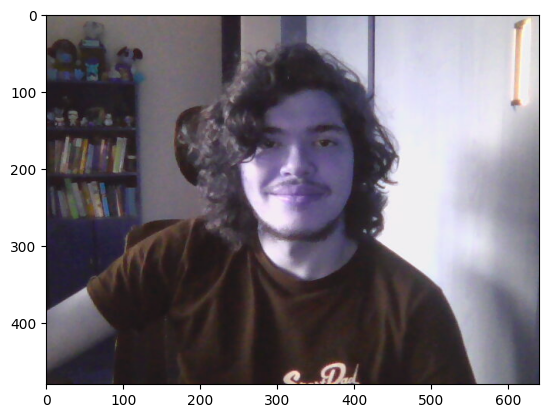

In [4]:
#Se procede a mostrar la imagen
plt.imshow(imagen)

In [5]:
#Para detectar rostros, se partirá del algoritmo de VIola Jones
#Se utiliza el archivo de la siguiente direccion> 
#https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
#El archivo se guarda como "datos.xml"
rasgos = cv2.CascadeClassifier("../juan/Documents/datos.xml")

In [6]:
#Como ejemplo, se destaca el rostro en la imagen anterior con OpenCV
while True:
    caras = rasgos.detectMultiScale(imagen) #Detecta rostros en la imagen
    for x,y,w,h in caras:
        cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,0,255), 4)
    cv2.imshow("Rostros detectados",imagen)
    if cv2.waitKey(2) == 27: #Si se presiona Escape
        break
cv2.destroyAllWindows()

In [7]:
#Se realiza lo mismo para capturas en tiempo real
#Se almacenan las caras detectadas en un arreglos
#Primero se almacenan datos SIN MASCARILLA
datos = [] #Se buscaran 1000 datos por arreglo
captura = cv2.VideoCapture(0)
while True:
    flag, imagen = captura.read()
    if flag:
        caras = rasgos.detectMultiScale(imagen) #Detecta rostros en la imagen
        for x,y,w,h in caras:
            cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,255,255), 3)
            cara = imagen[y:y+h, x:x+w,:]
            cara = cv2.resize(cara, (50,50))#Cambiar el tamaño
            print(len(datos))
            if len(datos)<=1000: #Se buscaran tener 1000 muestras
                datos.append(cara)
        cv2.imshow("Rostros detectados",imagen)
        if cv2.waitKey(2) == 27 or len(datos)>=1000: #Si se presiona Escape
            break
captura.release()
cv2.destroyAllWindows()
np.save("cara_visible.npy",datos)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
#Ahora se almacenan datos CON MASCARILLA
datos = [] #Se buscaran 1000 datos por arreglo
captura = cv2.VideoCapture(0)
while True:
    flag, imagen = captura.read()
    if flag:
        caras = rasgos.detectMultiScale(imagen) #Detecta rostros en la imagen
        for x,y,w,h in caras:
            cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,255,255), 3)
            cara = imagen[y:y+h, x:x+w,:]
            cara = cv2.resize(cara, (50,50))#Cambiar el tamaño
            print(len(datos))
            if len(datos)<=1000: #Se buscaran tener 1000 muestras
                datos.append(cara)
        cv2.imshow("Rostros detectados",imagen)
        if cv2.waitKey(2) == 27 or len(datos)>=1000: #Si se presiona Escape
            break
captura.release()
cv2.destroyAllWindows()
np.save("mascarilla.npy",datos)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27